# Ejercicio 0
Se usará el **make_moons** que genera dos semicírculos intercalados, donde no es eficiente un clasificador lineal.
Esto es un ejemplo ilustrativo en el que todo el dataset se toma como conjunto de entrenamiento y las métricas de evaluación se están evaluando sobre el conjunto de entrenamiento.
**Como tarea realizar el ejercicio, siguiendo los mismos pasos y obteniendo las mismas gráficas para el conjunto de test, pero separando el dataset en conjunto de entrenamiento y de test,  y después aplicar las métricas al conjunto de test.**

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.datasets import make_moons #Importa el dataset make_moons
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'numpy'

Primero vamos a dibujar el dataset.

In [2]:
#Para dibujar dataset y la función de decisión (límite entre clase positiva y negativa)
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [3]:
X, y = make_moons(n_samples=500, noise=0.15, random_state=42)

In [4]:
#Separamos en conjunto de entrenamiento y test. Esta celda servirá para hacer la tarea encargada
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20)

In [5]:
X[:2] #Ejemplo de la muestra

array([[ 0.83076711, -0.37213905],
       [ 0.89503242,  0.85830592]])

In [6]:
y[:5] #Ejemplo de la etiqueta

array([1, 0, 1, 0, 0])

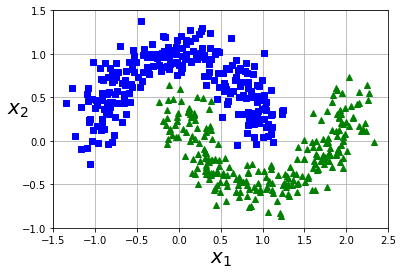

In [7]:
#Función para representar el data set en dos dimensiones
def plot_dataset(X, y, axes):
    #Dibuja con cuadrado azul todas las instancias negativas (y==0)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    #Dibuja con triángulo verde todaslas etiquetas positivas (y==1)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    #Dibuja ejes y sus etiquetas
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
#Dibuja definiendo los intervalos d
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# **Ahora usamos un clasificador lineal**

In [8]:
linear_svc_clasificador = make_pipeline(StandardScaler(), LinearSVC(C=1, loss="hinge"))
#C: float, default=1.0. Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positiva.
#loss: {‘hinge’, ‘squared_hinge’}, default=’squared_hinge’. Indica la función de pérdida. hinge indica función lineal y squared_hinge cuadrática
#max_iter: int, default=1000. El número máximo de iteraciones que se ejecutarán.

Ahora ajustamos el modelo

In [9]:
linear_svc_clasificador.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, loss='hinge'))])

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = linear_svc_clasificador.predict(X)
cm = confusion_matrix(y, y_pred)

In [11]:
cm

array([[217,  33],
       [ 33, 217]])

In [12]:
accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred)

(0.868, 0.868, 0.868)

Vamos a dibujar el resultado

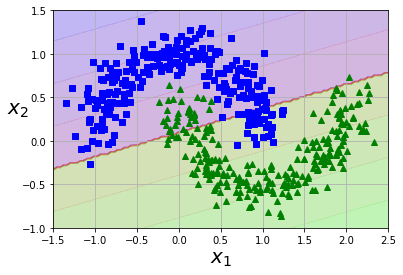

In [13]:
#Función para representar el conjunto de entrenamiento y la función de decisión que representa el límite para 
#decidir entre clase positiva y negativa.
#Recibe como parámetros el clasificador y los extremos de los ejes x e y
def plot_predictions(clf, axes):
    #genera las líneas de los ejes a partir de un array de 100 puntos entre los extremos
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    #Crea la malla rectangular en el gráfico a partir de las líneas anteriores
    x0, x1 = np.meshgrid(x0s, x1s)
    #Con ravel pasa a una dimensión (flatten) x0 y x1 y después los concatena
    #Así genera todos los valores de X para representar la función de decisión
    X = np.c_[x0.ravel(), x1.ravel()]
    #Obtiene todos los valores de y_pred para todos los valores de X a partir del clasificador
    y_pred = clf.predict(X).reshape(x0.shape)
    #Obtiene todos los valores de y_pred para todos los valores de X a partir de la función de decisión
    y_decision = clf.decision_function(X).reshape(x0.shape)
    #Define las regiones que va a rellenar de color
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(linear_svc_clasificador, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

# **Ahora usamos un clasificador no lineal basado en svm con un kernel polinómico de grado 3**

In [14]:
polinomico_svc_clasificador = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))
#kernel = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
        #Especifica el tipo de kernel que se utilizará en el algoritmo. Si no se proporciona ninguno, se utilizará 'rbf'.
#degree: int, default=3. Especifica el grado del polinomio
#coef0: float, default=0.0. Término independiente en la función kernel. Solo es significativo en 'poli' y 'sigmoide'.
#C: float, default=1.0. Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. 
                        #Debe ser estrictamente positiva. La penalización es una penalización de l2 al cuadrado.

In [15]:
polinomico_svc_clasificador.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [16]:
y_pred = polinomico_svc_clasificador.predict(X)
cm = confusion_matrix(y, y_pred)

In [17]:
cm

array([[249,   1],
       [  1, 249]])

In [18]:
accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred)

(0.996, 0.996, 0.996)

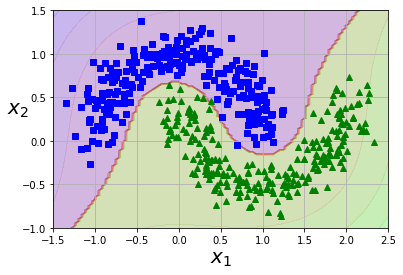

In [19]:
plot_predictions(polinomico_svc_clasificador, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

# **Ahora usamos un clasificador no lineal basado en svm con un kernel polinómico de grado 6, que estaría sobreajustado a los datos de entrenamiento**

In [20]:
polinomico_svc_clasificador10 = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=10, coef0=1, C=5))
#kernel = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
        #Especifica el tipo de kernel que se utilizará en el algoritmo. Si no se proporciona ninguno, se utilizará 'rbf'.
#degree: int, default=3. Especifica el grado del polinomio
#coef0: float, default=0.0. Término independiente en la función kernel. Solo es significativo en 'poli' y 'sigmoide'.
#C: float, default=1.0. Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. 
                        #Debe ser estrictamente positiva. La penalización es una penalización de l2 al cuadrado.

In [21]:
polinomico_svc_clasificador10.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

In [22]:
y_pred = polinomico_svc_clasificador10.predict(X)
cm = confusion_matrix(y, y_pred)

In [23]:
cm

array([[250,   0],
       [  0, 250]])

In [24]:
accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred)

(1.0, 1.0, 1.0)

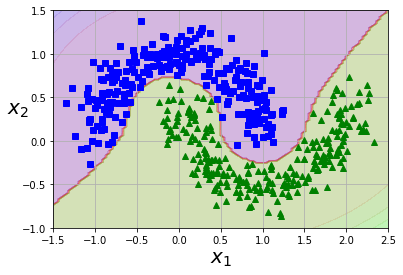

In [25]:
plot_predictions(polinomico_svc_clasificador10, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [26]:
#Todos los apartados anteriores se han realizado tomando todo el dataset como conjunto de entrenamiento, sin particionar en conjuntos de test y entrenamiento.
#Ahora vamos a realizar validación cruzada usando este último clasificador.

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(polinomico_svc_clasificador10, X, y, cv=5, scoring="accuracy")
#En este caso la validación cruzada se realiza particioando el conjunto de entrenamiento en cinco partes.

array([1.  , 0.98, 0.99, 1.  , 0.98])